<a href="https://colab.research.google.com/github/piyush519/github-slideshow/blob/master/blank_starter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.utils.colab.set_colab_file_id('1gqZ0VDGu1gBRmJ6DbBO8GB41qyUZhEJc')

In [57]:
!pip install jovian --upgrade --quiet

In [58]:
project_name = "course-project-cnn"

In [59]:
import os
import torch
import torchvision
import tarfile
from torchvision.datasets.utils import download_url
from torch.utils.data import random_split

## Who let the dogs out??
- We are training the model so that it should be able to identify a dog by  breeds.

In [60]:
# Dowload the dataset
dataset_url = "https://s3.amazonaws.com/fast-ai-imageclas/imagewoof2-160.tgz"
download_url(dataset_url, '.')

Using downloaded and verified file: ./imagewoof2-160.tgz


In [61]:
# Extract from archive
with tarfile.open('./imagewoof2-160.tgz', 'r:gz') as tar:
    tar.extractall(path='./data')

In [62]:
data_dir = './data/imagewoof2-160'

print(os.listdir(data_dir))
classes = os.listdir(data_dir + "/train")
print(classes)

['train', 'val']
['n02105641', 'n02093754', 'n02096294', 'n02086240', 'n02089973', 'n02087394', 'n02099601', 'n02088364', 'n02111889', 'n02115641']


### We are not able to get the breed names of the dogs along with the images. We got serial numbers.

In [63]:
# just looking at a class
a_dog_class = os.listdir(data_dir + '/train/n02087394')
print(a_dog_class)

['n02087394_7107.JPEG', 'n02087394_2177.JPEG', 'n02087394_15766.JPEG', 'n02087394_9897.JPEG', 'n02087394_16395.JPEG', 'n02087394_8418.JPEG', 'n02087394_10939.JPEG', 'n02087394_28848.JPEG', 'n02087394_5625.JPEG', 'n02087394_16385.JPEG', 'n02087394_13465.JPEG', 'n02087394_8015.JPEG', 'n02087394_1698.JPEG', 'n02087394_4465.JPEG', 'n02087394_278.JPEG', 'n02087394_675.JPEG', 'n02087394_19154.JPEG', 'n02087394_1908.JPEG', 'n02087394_9125.JPEG', 'n02087394_22925.JPEG', 'n02087394_16306.JPEG', 'n02087394_35505.JPEG', 'n02087394_2598.JPEG', 'n02087394_8288.JPEG', 'n02087394_4016.JPEG', 'ILSVRC2012_val_00034616.JPEG', 'n02087394_11696.JPEG', 'n02087394_3898.JPEG', 'n02087394_2604.JPEG', 'n02087394_5486.JPEG', 'n02087394_536.JPEG', 'n02087394_2609.JPEG', 'n02087394_3023.JPEG', 'n02087394_4124.JPEG', 'n02087394_23719.JPEG', 'n02087394_16268.JPEG', 'n02087394_25936.JPEG', 'n02087394_33203.JPEG', 'n02087394_12909.JPEG', 'n02087394_10209.JPEG', 'n02087394_14388.JPEG', 'n02087394_30477.JPEG', 'n020873

In [64]:
import torchvision.transforms as tt
from torchvision.datasets import ImageFolder
change = tt.Compose([tt.CenterCrop(160),tt.ToTensor()])
train_ds = ImageFolder(data_dir+'/train', change)
val_ds = ImageFolder(data_dir+'/val', change)

In [65]:
img, label = train_ds[1200]
print(img.shape, label)
img

torch.Size([3, 160, 160]) 1


tensor([[[0.4235, 0.3608, 0.2784,  ..., 0.2902, 0.4784, 0.3922],
         [0.4745, 0.4353, 0.3294,  ..., 0.2314, 0.2431, 0.2510],
         [0.3569, 0.3255, 0.3647,  ..., 0.2980, 0.2667, 0.2157],
         ...,
         [0.5137, 0.6980, 0.6745,  ..., 0.6039, 0.5608, 0.6588],
         [0.5608, 0.6118, 0.7176,  ..., 0.6471, 0.6196, 0.6431],
         [0.6667, 0.5569, 0.6275,  ..., 0.5020, 0.4627, 0.4627]],

        [[0.5216, 0.4588, 0.3686,  ..., 0.3529, 0.5412, 0.4510],
         [0.5686, 0.5255, 0.4196,  ..., 0.2941, 0.2980, 0.3020],
         [0.4510, 0.4157, 0.4471,  ..., 0.3529, 0.3137, 0.2549],
         ...,
         [0.4667, 0.6510, 0.6275,  ..., 0.5490, 0.5059, 0.5961],
         [0.5216, 0.5725, 0.6784,  ..., 0.5922, 0.5647, 0.5804],
         [0.6353, 0.5255, 0.5961,  ..., 0.4471, 0.4078, 0.4039]],

        [[0.4471, 0.3843, 0.2980,  ..., 0.2392, 0.4275, 0.3373],
         [0.5059, 0.4627, 0.3569,  ..., 0.1882, 0.1961, 0.2000],
         [0.3882, 0.3529, 0.3882,  ..., 0.2549, 0.2196, 0.

In [66]:
print(train_ds.classes)

['n02086240', 'n02087394', 'n02088364', 'n02089973', 'n02093754', 'n02096294', 'n02099601', 'n02105641', 'n02111889', 'n02115641']


In [67]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

matplotlib.rcParams['figure.facecolor'] = '#ffffff'

In [68]:

def show_example(img, label):
    print('Label: ', train_ds.classes[label], "("+str(label)+")")
    plt.imshow(img.permute(1, 2, 0))

Label:  n02087394 (1)


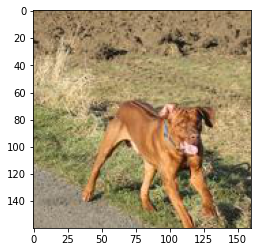

In [69]:
show_example(*train_ds[1111])

Label:  n02096294 (5)


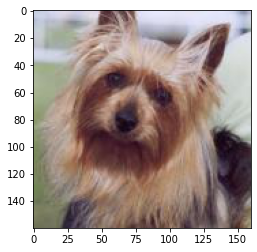

In [70]:
show_example(*train_ds[5000])

In [71]:
jovian.commit(project = project_name)


[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Capturing environment..
[jovian] Attaching records (metrics, hyperparameters, dataset etc.)
[jovian] Committed successfully! https://jovian.ai/athawalepiyush/course-project-cnn


'https://jovian.ai/athawalepiyush/course-project-cnn'

##SO FAR
1. We downloaded the dataset.
2. We got to know that we have not got the names of the breed.
3. We saw that images are not square images.


In [72]:
jovian.commit(environment = None, project = project_name)

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Attaching records (metrics, hyperparameters, dataset etc.)
[jovian] Committed successfully! https://jovian.ai/athawalepiyush/course-project-cnn


'https://jovian.ai/athawalepiyush/course-project-cnn'

## Now we will train the model...

In [73]:
len(train_ds)

9025

In [74]:
random_seed = 42
torch.manual_seed(random_seed)

In [75]:
jovian.log_dataset(dataset_url=dataset_url, val_size=len(val_ds), random_seed=random_seed)

[jovian] Dataset logged.


In [76]:
from torch.utils.data.dataloader import DataLoader

batch_size=128

In [77]:
train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_dl = DataLoader(val_ds, batch_size*2, num_workers=4, pin_memory=True)

In [78]:
from torchvision.utils import make_grid

def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=16).permute(1, 2, 0))
        break

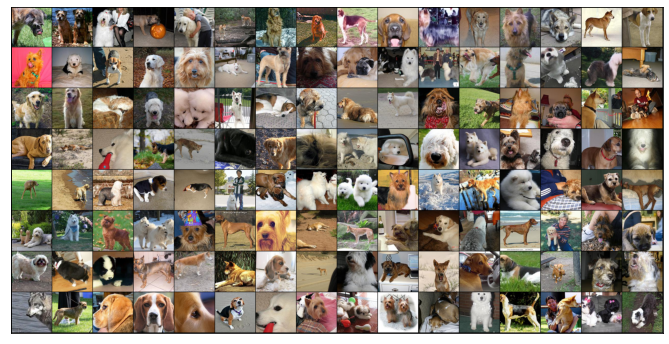

In [79]:
show_batch(train_dl)

In [80]:
jovian.commit(project=project_name, environment=None)

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Attaching records (metrics, hyperparameters, dataset etc.)
[jovian] Committed successfully! https://jovian.ai/athawalepiyush/course-project-cnn


'https://jovian.ai/athawalepiyush/course-project-cnn'

In [81]:
import torch.nn as nn
import torch.nn.functional as F

In [82]:
class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))
        
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [105]:
class Cifar10CnnModel(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 64 x 80 x 80

            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 128 x 40 x 40

            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 256 x 20 x 20

            nn.Flatten(), 
            nn.Linear(256*20*20, 1024*4),
            nn.ReLU(),
            nn.Linear(1024*4, 1024),
            nn.ReLU(),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Linear(512, 10))
        
    def forward(self, xb):
        return self.network(xb)

In [97]:
model = Cifar10CnnModel()
model

Cifar10CnnModel(
  (network): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Flatten(start_dim=1, end_dim=-1)
    (16): Linear(in_features=102400, out_features=1024, bias=True)
    (17): ReLU()
    (18): Linear(in_fe

In [98]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [99]:
device = get_default_device()
device

device(type='cuda')

In [100]:
train_dl = DeviceDataLoader(train_dl, device)
val_dl = DeviceDataLoader(val_dl, device)
to_device(model, device);

RuntimeError: ignored

In [88]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [89]:
model = to_device(Cifar10CnnModel(), device)

In [90]:
evaluate(model, val_dl)

{'val_acc': 0.097900390625, 'val_loss': 2.3045883178710938}

In [91]:
num_epochs = 10
opt_func = torch.optim.Adam
lr = 0.001

In [92]:
jovian.reset()
jovian.log_hyperparams({
    'num_epochs': num_epochs,
    'opt_func': opt_func.__name__,
    'batch_size': batch_size,
    'lr': lr,
})

[jovian] Hyperparams logged.


In [103]:
torch.cuda.empty_cache()

In [104]:
history = fit(num_epochs, lr, model, train_dl, val_dl, opt_func)

RuntimeError: ignored

In [ ]:
jovian.log_metrics(train_loss=history[-1]['train_loss'], 
                   val_loss=history[-1]['val_loss'], 
                   val_acc=history[-1]['val_acc'])

In [ ]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

In [ ]:
plot_accuracies(history)

In [ ]:
jovian.commit(project = project_name)